In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#Read in the files
gf1 = gpd.read_file('../scratch/LCPNetwork.shp')
gf2 = gpd.read_file('../scratch/LCPNetwork_AllNG.shp')
gf3 = gpd.read_file('../scratch/LCPNetwork_Random.shp')

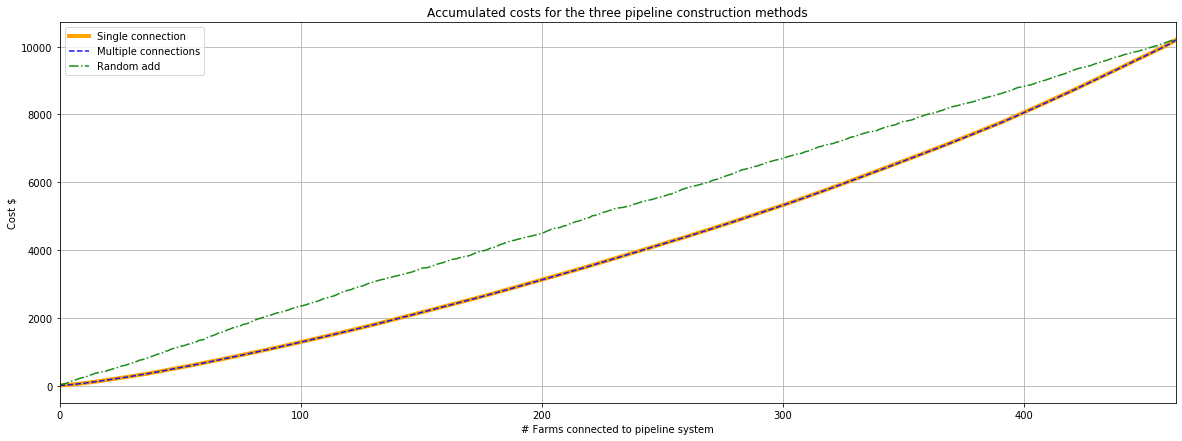

In [39]:
#Plot costs for the three methods
ax = gf1['SumCosts'].plot(figsize=(20,7),lw=4,c='Orange',label='Single connection')
gf2['SumCosts'].plot(ax=ax,color='Blue',ls='--',alpha=0.9,label='Multiple connections')
gf3['SumCosts'].plot(ax=ax,color='Green',ls='-.',alpha=0.9,label='Random add')
ax.set_title("Accumulated costs for the three pipeline construction methods")
ax.set_xlabel("# Farms connected to pipeline system")
ax.set_ylabel("Cost $")
ax.legend()
ax.grid();

In [43]:
#Compute accumulated production 
gf1['SumProduction_1']=gf1['Total Pote'].cumsum()
gf2['SumProduction_2']=gf2['Total Pote'].cumsum()

In [17]:
gf1.head()

,Ids,Costs,SumCosts,Order,Total Pote,SumYield,geometry
0,141,2.535866,2.535866,1,5450.830387,5450.830387,LINESTRING (1534280.329855267 -418673.20573852...
1,197,2.903146,5.439013,2,5237.045262,10687.875649,LINESTRING (1550280.329855267 -410173.20573852...
2,163,4.146940,9.585953,3,4274.978908,14962.854557,LINESTRING (1537780.329855267 -416173.20573852...
3,202,6.702868,16.288821,4,3038.314870,18001.169427,LINESTRING (1549780.329855267 -409173.20573852...
4,116,6.969685,23.258505,5,2948.403709,20949.573136,LINESTRING (1536780.329855267 -420173.20573852...


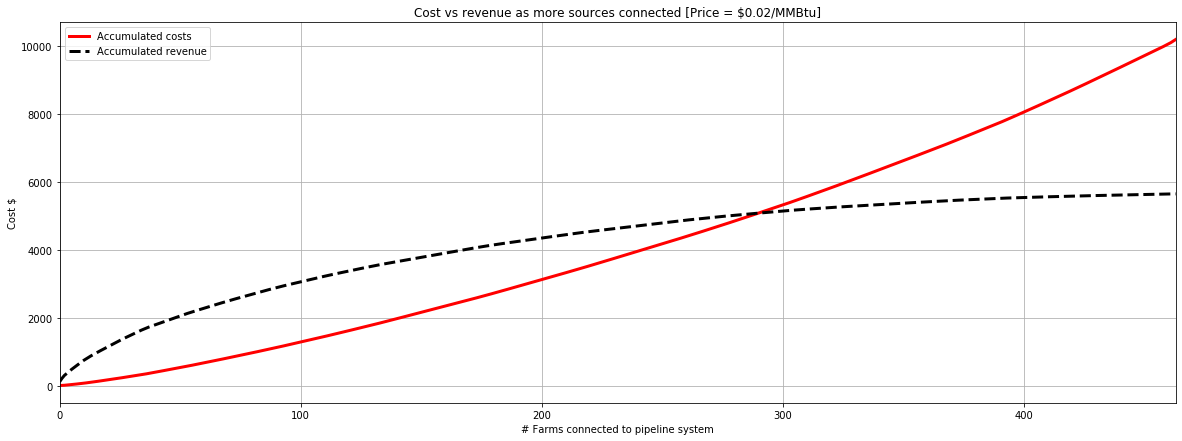

In [29]:
#Price of gas
price = 0.02 #$ per MMBtu

#Compute accumulated revenue and plot
gf1['SumRevenue'] = gf1['SumYield']* price
gf2['SumRevenue'] = gf2['SumYield']* price
gf3['SumRevenue'] = gf3['SumYield']* price

ax = gf1['SumCosts'].plot(figsize=(20,7),lw=3,c='Red',label='Accumulated costs')
gf1['SumRevenue'].plot(ax=ax,color='Black',lw=3,linestyle='--',label='Accumulated revenue')
ax.set_xlabel("# Farms connected to pipeline system")
ax.set_ylabel("Cost $")
ax.legend()
ax.set_title("Cost vs revenue as more sources connected [Price = ${}/MMBtu]".format(price))
ax.grid();